In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import tensorflow as tf
from tensorflow.keras.layers import Normalization, Dense, InputLayer, Dropout
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")

In [ ]:
dados = pd.read_csv('train.csv')

# Análise Inicial

In [ ]:
dados.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [ ]:
dados.shape

(1000, 12)

In [ ]:
dados.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [ ]:
dados.duplicated().sum()

0

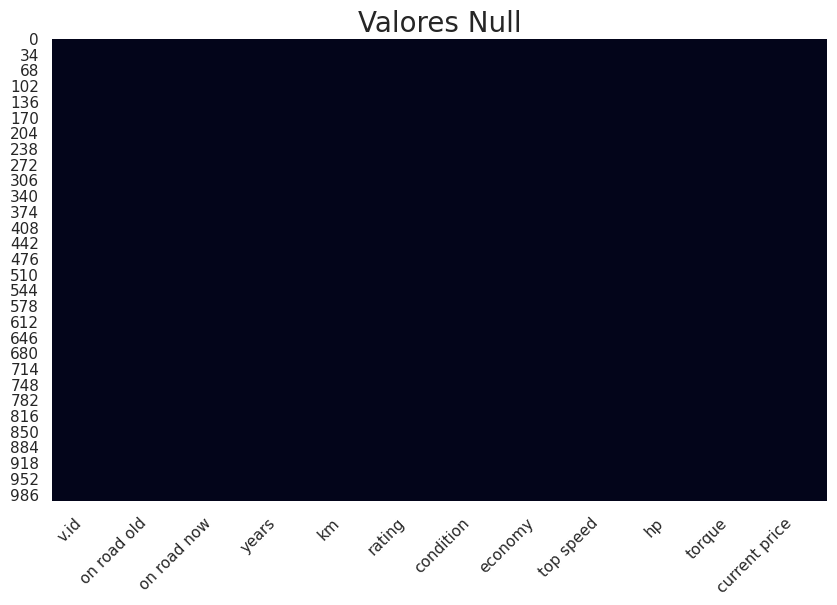

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data=dados.isnull(), cbar=False)
plt.title("Valores Null",fontsize=20)
plt.xticks(ha="right",rotation=45);

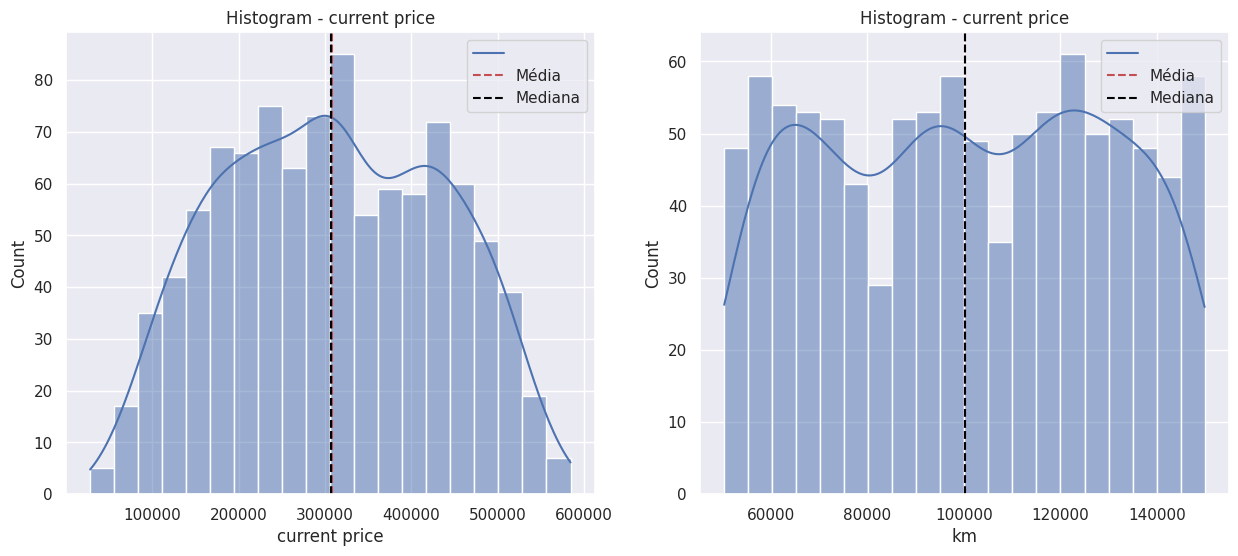

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(data =dados , x="current price", bins = 20, kde = True)
plt.axvline(dados["current price"].mean(), color = "r", ls = "--")
plt.axvline(dados["current price"].median(), color = "black", ls = "--")
plt.legend(['','Média','Mediana'])
plt.title('Histogram - current price');

plt.subplot(1,2,2)
sns.histplot(data =dados , x="km", bins = 20, kde = True)
plt.axvline(dados["km"].mean(), color = "r", ls = "--")
plt.axvline(dados["km"].median(), color = "black", ls = "--")
plt.legend(['','Média','Mediana'])
plt.title('Histogram - current price');

In [ ]:
dados.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [ ]:
fig = make_subplots(rows=3, cols=3)

trace0 = go.Histogram(x=dados.years, nbinsx=20, name='years')
trace1 = go.Histogram(x=dados.km, nbinsx = 20, name='km')
trace2 = go.Histogram(x=dados.condition, nbinsx=20, name='condition')
trace3 = go.Histogram(x=dados.rating, nbinsx=20, name='rating')
trace4 = go.Histogram(x=dados.economy, nbinsx=20, name='economy')
trace5 = go.Histogram(x=dados['top speed'], nbinsx=20, name='top speed')
trace6 = go.Histogram(x=dados.torque, nbinsx=20, name='torque')
trace7 = go.Histogram(x=dados['current price'], nbinsx=20, name='current price')
trace8 = go.Histogram(x=dados.hp, nbinsx=20, name='hp')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig.append_trace(trace5, 2, 3)
fig.append_trace(trace6, 3, 1)
fig.append_trace(trace7, 3, 2)
fig.append_trace(trace8, 3, 3)

fig.update_layout(title_text='Histogram - Análise das Features')
fig.show()

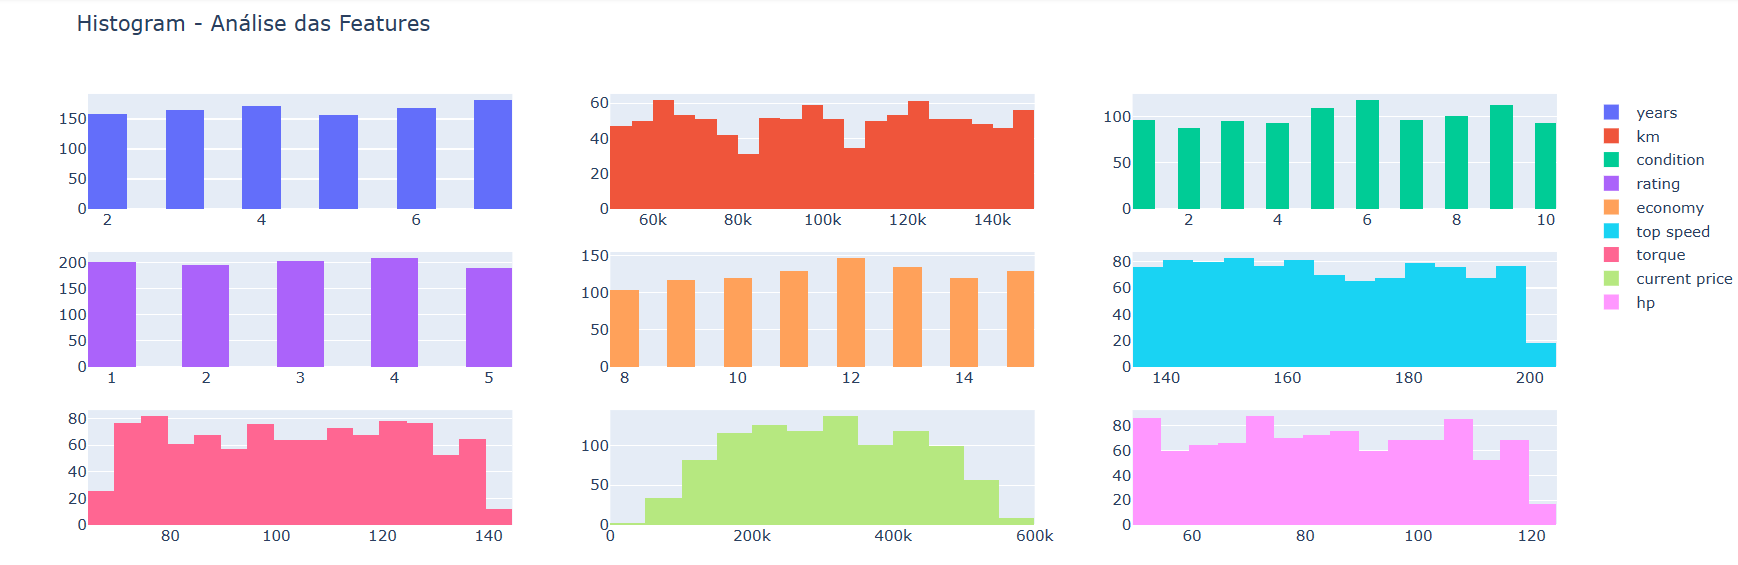

In [ ]:
fig = make_subplots(rows=3, cols=3)

trace0 = go.Box(x=dados.years, name='years')
trace1 = go.Box(x=dados.km,  name='km')
trace2 = go.Box(x=dados.condition,  name='condition')
trace3 = go.Box(x=dados.rating,  name='rating')
trace4 = go.Box(x=dados.economy,  name='economy')
trace5 = go.Box(x=dados['top speed'],  name='top speed')
trace6 = go.Box(x=dados.torque, name='torque')
trace7 = go.Box(x=dados['current price'],  name='current price')
trace8 = go.Box(x=dados.hp,  name='hp')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig.append_trace(trace5, 2, 3)
fig.append_trace(trace6, 3, 1)
fig.append_trace(trace7, 3, 2)
fig.append_trace(trace8, 3, 3)

fig.update_layout(title_text='Boxplot - Análise das Features')
fig.show()

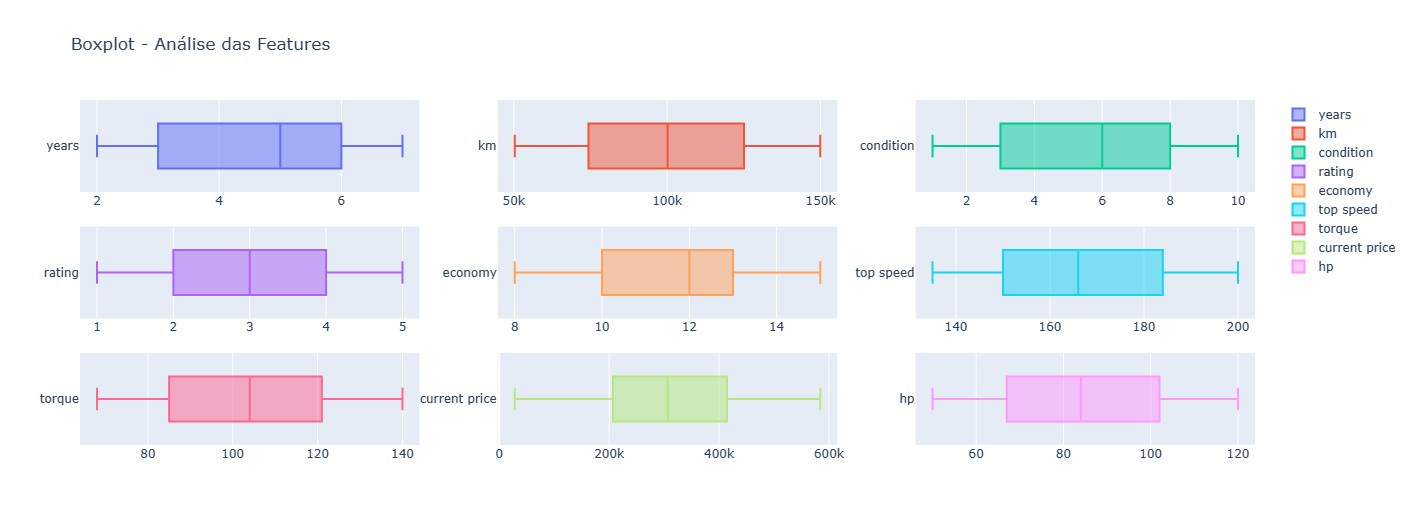

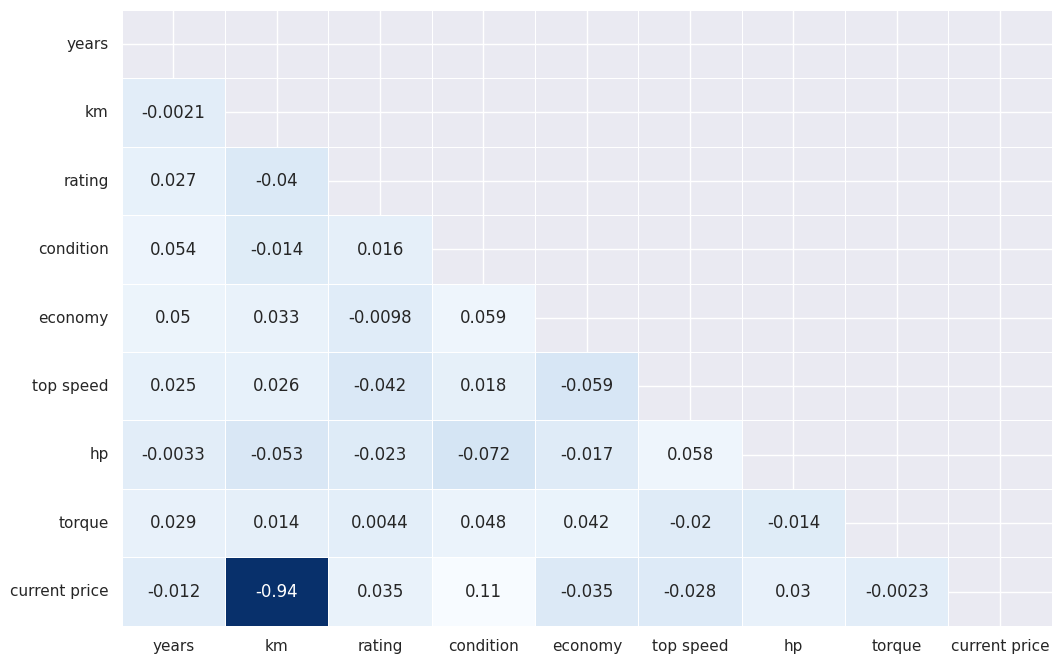

In [ ]:
dd = dados[['years', 'km', 'rating','condition', 'economy', 'top speed', 'hp', 'torque', 'current price']].copy()
plt.figure(figsize=(12,8))
sns.heatmap(dd.corr(),  cbar=False, mask=np.triu(dd.corr()), annot=True,linewidth=0.7, linecolor='white', cmap = 'Blues_r');

# Preparação dos Dados

Transformando para tipo tensorflow

In [ ]:
tensor_data = tf.constant(dados)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


Embaralhando os dados

In [ ]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[4.680000e+02 6.319670e+05 8.069290e+05 3.000000e+00 1.495650e+05
  5.000000e+00 1.000000e+00 9.000000e+00 1.510000e+02 7.100000e+01
  1.250000e+02 1.228435e+05]
 [7.630000e+02 6.163710e+05 8.523400e+05 6.000000e+00 7.438300e+04
  1.000000e+00 7.000000e+00 1.100000e+01 1.660000e+02 6.400000e+01
  9.300000e+01 4.415615e+05]
 [7.880000e+02 6.447710e+05 7.028840e+05 6.000000e+00 1.479320e+05
  4.000000e+00 1.000000e+00 1.000000e+01 1.640000e+02 6.500000e+01
  7.200000e+01 7.892450e+04]
 [1.440000e+02 6.536310e+05 7.303420e+05 7.000000e+00 1.159510e+05
  1.000000e+00 4.000000e+00 8.000000e+00 1.970000e+02 1.020000e+02
  9.000000e+01 2.205180e+05]
 [8.880000e+02 5.751870e+05 7.203210e+05 2.000000e+00 1.346780e+05
  5.000000e+00 1.000000e+00 1.500000e+01 1.910000e+02 8.500000e+01
  8.800000e+01 1.108835e+05]], shape=(5, 12), dtype=float32)


In [ ]:
x = tensor_data[:,3:-1]
print(x[:5])

tf.Tensor(
[[3.00000e+00 1.49565e+05 5.00000e+00 1.00000e+00 9.00000e+00 1.51000e+02
  7.10000e+01 1.25000e+02]
 [6.00000e+00 7.43830e+04 1.00000e+00 7.00000e+00 1.10000e+01 1.66000e+02
  6.40000e+01 9.30000e+01]
 [6.00000e+00 1.47932e+05 4.00000e+00 1.00000e+00 1.00000e+01 1.64000e+02
  6.50000e+01 7.20000e+01]
 [7.00000e+00 1.15951e+05 1.00000e+00 4.00000e+00 8.00000e+00 1.97000e+02
  1.02000e+02 9.00000e+01]
 [2.00000e+00 1.34678e+05 5.00000e+00 1.00000e+00 1.50000e+01 1.91000e+02
  8.50000e+01 8.80000e+01]], shape=(5, 8), dtype=float32)


In [ ]:
y = tensor_data[:,-1]
y =  tf.expand_dims(y,axis=1) # Ajeitando o formato de (5,) para (5,1)
print(y[:5])

tf.Tensor(
[[122843.5]
 [441561.5]
 [ 78924.5]
 [220518. ]
 [110883.5]], shape=(5, 1), dtype=float32)


Normalizando os Dados

In [ ]:
normalizacao = Normalization()
normalizacao.adapt(x)
normalizacao(x)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.90849847,  1.6917483 ,  1.435001  , -1.6266173 , -1.1774276 ,
        -0.8243786 , -0.66056484,  1.0251243 ],
       [ 0.83749485, -0.88864344, -1.4178829 ,  0.49875355, -0.2803389 ,
        -0.04631917, -1.001917  , -0.49519697],
       [ 0.83749485,  1.6357006 ,  0.72178006, -1.6266173 , -0.72888327,
        -0.15006043, -0.9531525 , -1.4929078 ],
       [ 1.4194926 ,  0.5380508 , -1.4178829 , -0.56393194, -1.6259719 ,
         1.5616704 ,  0.8511379 , -0.6377271 ],
       [-1.4904962 ,  1.1807976 ,  1.435001  , -1.6266173 ,  1.5138384 ,
         1.2504466 ,  0.02213962, -0.73274714]], dtype=float32)>

Separando os Dados em Treino, Teste e Validação

In [ ]:
train_ratio =0.8
val_ratio = 0.1
test_ratio = 0.1
dataset_size = len(x)

In [ ]:
x_train = x[:int(dataset_size*train_ratio)]
y_train = y[:int(dataset_size*train_ratio)]
print(len(x_train))
print(len(y_train))

800
800


In [ ]:
x_val = x[int(dataset_size*train_ratio):int(dataset_size*(val_ratio+train_ratio))]
y_val = y[int(dataset_size*train_ratio):int(dataset_size*(val_ratio+train_ratio))]
print(len(x_val))
print(len(y_val))

100
100


In [ ]:
x_test = x[int(dataset_size*(val_ratio+train_ratio)):]
y_test = y[int(dataset_size*(val_ratio+train_ratio)):]
print(len(x_test))
print(len(y_test))

100
100


# Criando e Treinando o Modelo

In [ ]:
model =tf.keras.Sequential([
                          InputLayer(input_shape=(8,)),
                          normalizacao,
                          Dense(128, activation = "relu"),

                          Dense(128, activation = "relu"),
                          Dropout(0.1),
                          Dense(128, activation = "relu"),
                          Dropout(0.1),

                          Dense(1)
])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense_66 (Dense)            (None, 128)               1152      
                                                                 
 dense_67 (Dense)            (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_68 (Dense)            (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                     

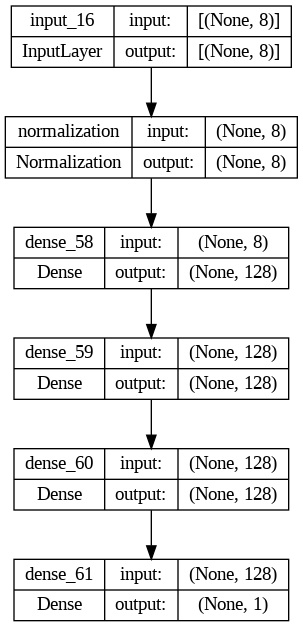

In [ ]:
tf.keras.utils.plot_model(model, to_file="model.png",show_shapes=True)

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss=MeanAbsoluteError(), metrics=RootMeanSquaredError())

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_val,y_val), epochs=100, verbose=1)

Epoch 1/100
25/25 [==============================] - 0s 6ms/step - loss: 38071.6367 - root_mean_squared_error: 47921.3125 - val_loss: 34660.3008 - val_root_mean_squared_error: 43842.0469
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 38252.1992 - root_mean_squared_error: 48338.3516 - val_loss: 34451.7734 - val_root_mean_squared_error: 43364.5469
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 38761.5312 - root_mean_squared_error: 48111.4453 - val_loss: 34160.2383 - val_root_mean_squared_error: 43224.4023
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 38502.3516 - root_mean_squared_error: 48204.4727 - val_loss: 34535.4219 - val_root_mean_squared_error: 43309.1016
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 38712.1367 - root_mean_squared_error: 48543.2109 - val_loss: 34652.5000 - val_root_mean_squared_error: 43715.3398
Epoch 6/100
25/25 [==============================] - 0s 5ms/step 

# Análise do Modelo

In [ ]:
ind = np.arange(100)


fig = go.Figure()
fig.add_trace(go.Scatter(x=ind, y=history.history['loss'] ,
                    mode='lines',
                    name='Loss Treino'))

fig.add_trace(go.Scatter(x=ind, y=history.history['val_loss'] ,
                    mode='lines+markers',
                    name='Loss Validação'))

fig.update_layout(title_text='Análise Loss')
fig.show()

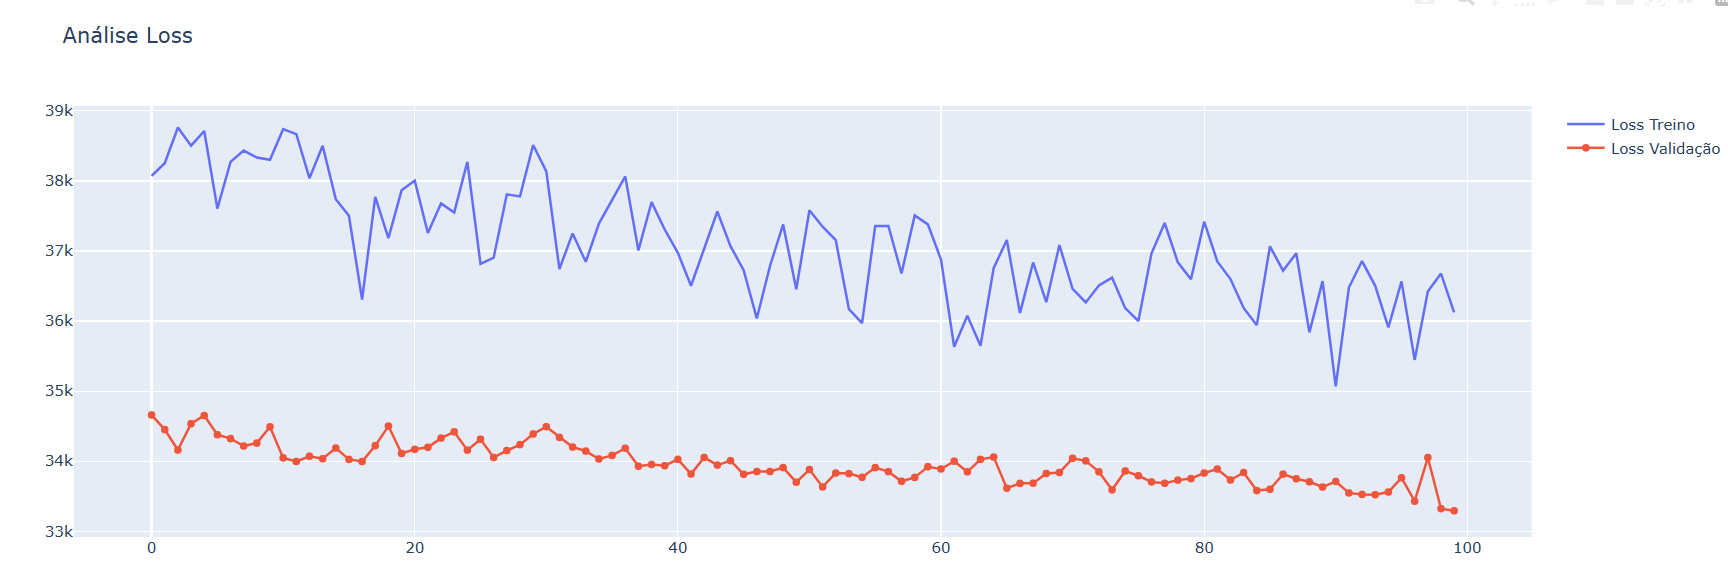

In [ ]:
ind = np.arange(100)


fig = go.Figure()
fig.add_trace(go.Scatter(x=ind, y=history.history['root_mean_squared_error'] ,
                    mode='lines',
                    name='Rmse Treino'))

fig.add_trace(go.Scatter(x=ind, y=history.history['val_root_mean_squared_error'],
                    mode='lines+markers',
                    name='Rmse Validação'))

fig.update_layout(title_text='Análise RMSE')
fig.show()

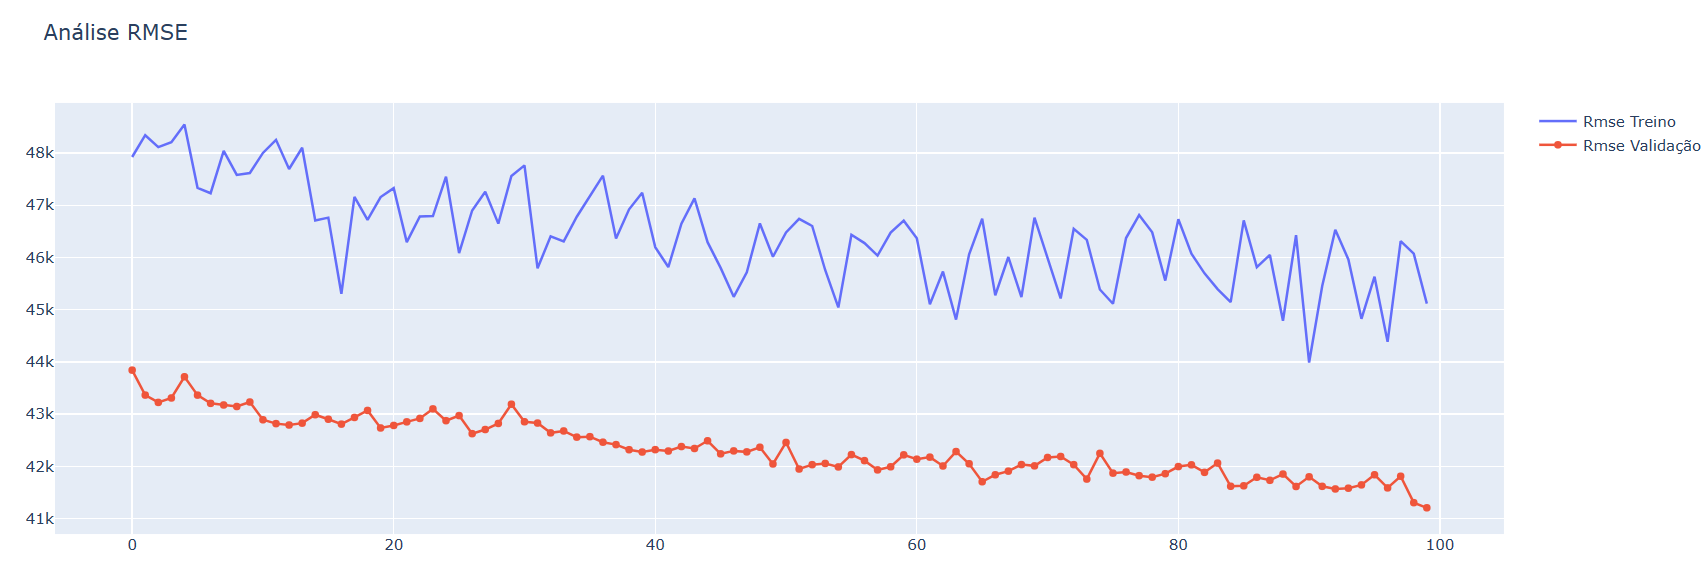

In [ ]:
y_true = list(y_test[:,0].numpy())

In [ ]:
y_pred = list(model.predict(x_test)[:,0])
print(y_pred)

4/4 [==============================] - 0s 3ms/step
[139603.64, 299313.72, 144969.34, 137356.66, 240129.66, 186599.0, 203469.66, 347997.38, 291529.62, 410119.6, 254920.69, 190697.11, 443963.03, 153550.92, 482639.38, 240604.02, 273396.8, 293819.2, 235169.38, 389055.78, 500414.03, 266519.25, 197144.03, 272526.6, 357562.25, 338552.97, 475801.0, 519128.34, 424785.72, 206150.44, 325654.4, 324663.44, 499895.56, 186382.5, 298205.72, 210846.1, 150051.69, 454204.28, 292002.53, 467660.78, 461495.9, 216220.69, 513947.78, 196036.58, 468482.97, 410465.62, 143606.25, 519149.44, 518541.97, 418202.7, 216982.14, 289789.1, 349057.47, 343299.9, 175921.03, 261877.36, 144681.19, 288613.6, 449862.03, 529950.06, 464464.84, 420956.53, 193146.06, 211667.25, 254237.75, 167606.56, 303756.66, 172145.38, 376710.34, 205948.34, 162065.22, 222495.0, 330797.7, 214046.9, 404128.97, 165909.05, 115358.01, 151514.31, 306437.28, 282786.97, 254777.58, 330211.22, 193707.34, 225012.94, 349307.03, 237607.05, 215569.22, 397389.8

In [ ]:
ind = np.arange(100)

fig = go.Figure()
fig.add_trace(go.Scatter(x=ind, y=y_pred ,
                    mode='lines',
                    name='Valores Preditos'))

fig.add_trace(go.Scatter(x=ind, y=y_true,
                    mode='lines+markers',
                    name='Valores Reais'))

fig.show()

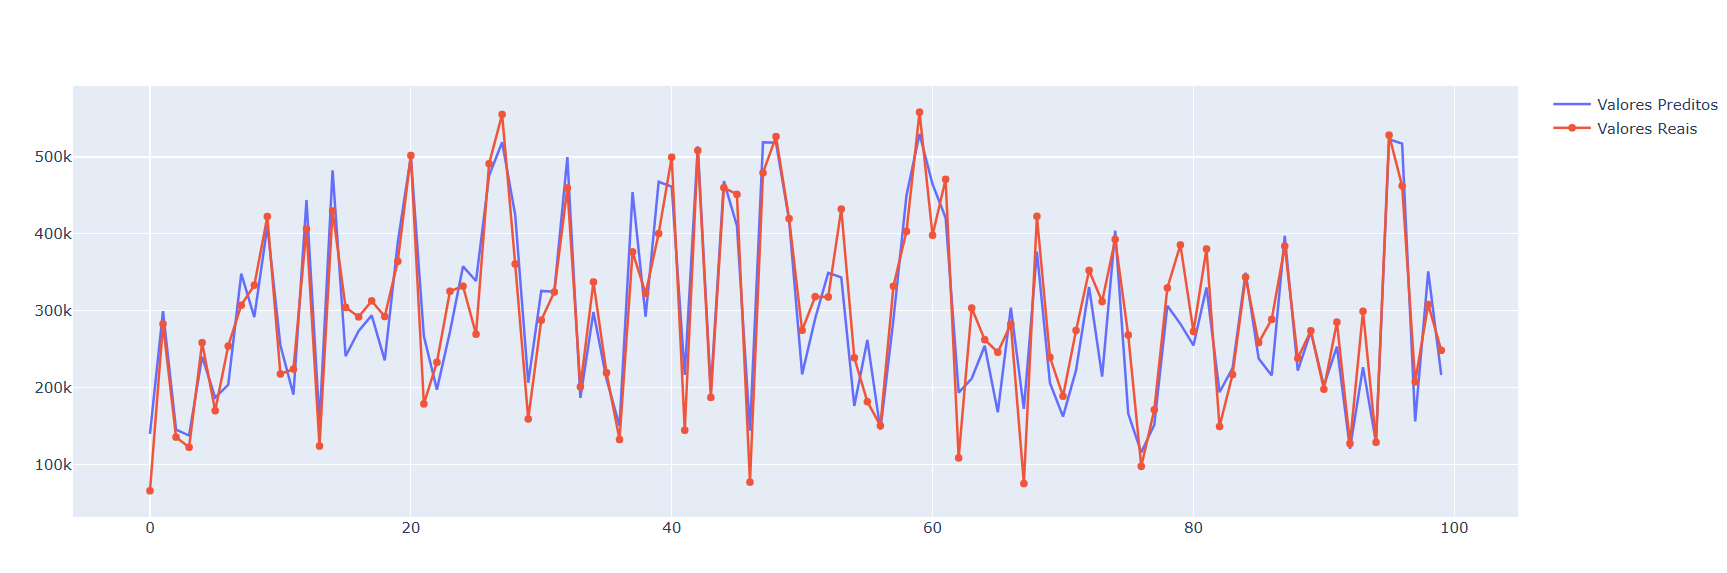